## Importing and displaying a tensorflow graph

This notebook demonstrates how to import and display a large tensorflow graph

#### Imports

In [1]:
import os
from gamma import *
from gamma import convert, utils, tflow, protobuf

/Users/david/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### 1: Download the model

In [2]:
fpath = utils.get_file('http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz')
model = tflow.load_graph_def(os.path.join(fpath, 'ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb'))

#### 2: Import into Gamma

In [3]:
graph = convert.from_tflow(model)
len(graph)

5990

#### 3: Explore the graph

The graph that we have imported is a Mobilenet SSD object detection network with nearly 6000 nodes. Drawing it directly is going to be slow and not very informative. One option is to draw the first $n$ nodes of the (topologically sorted) graph.

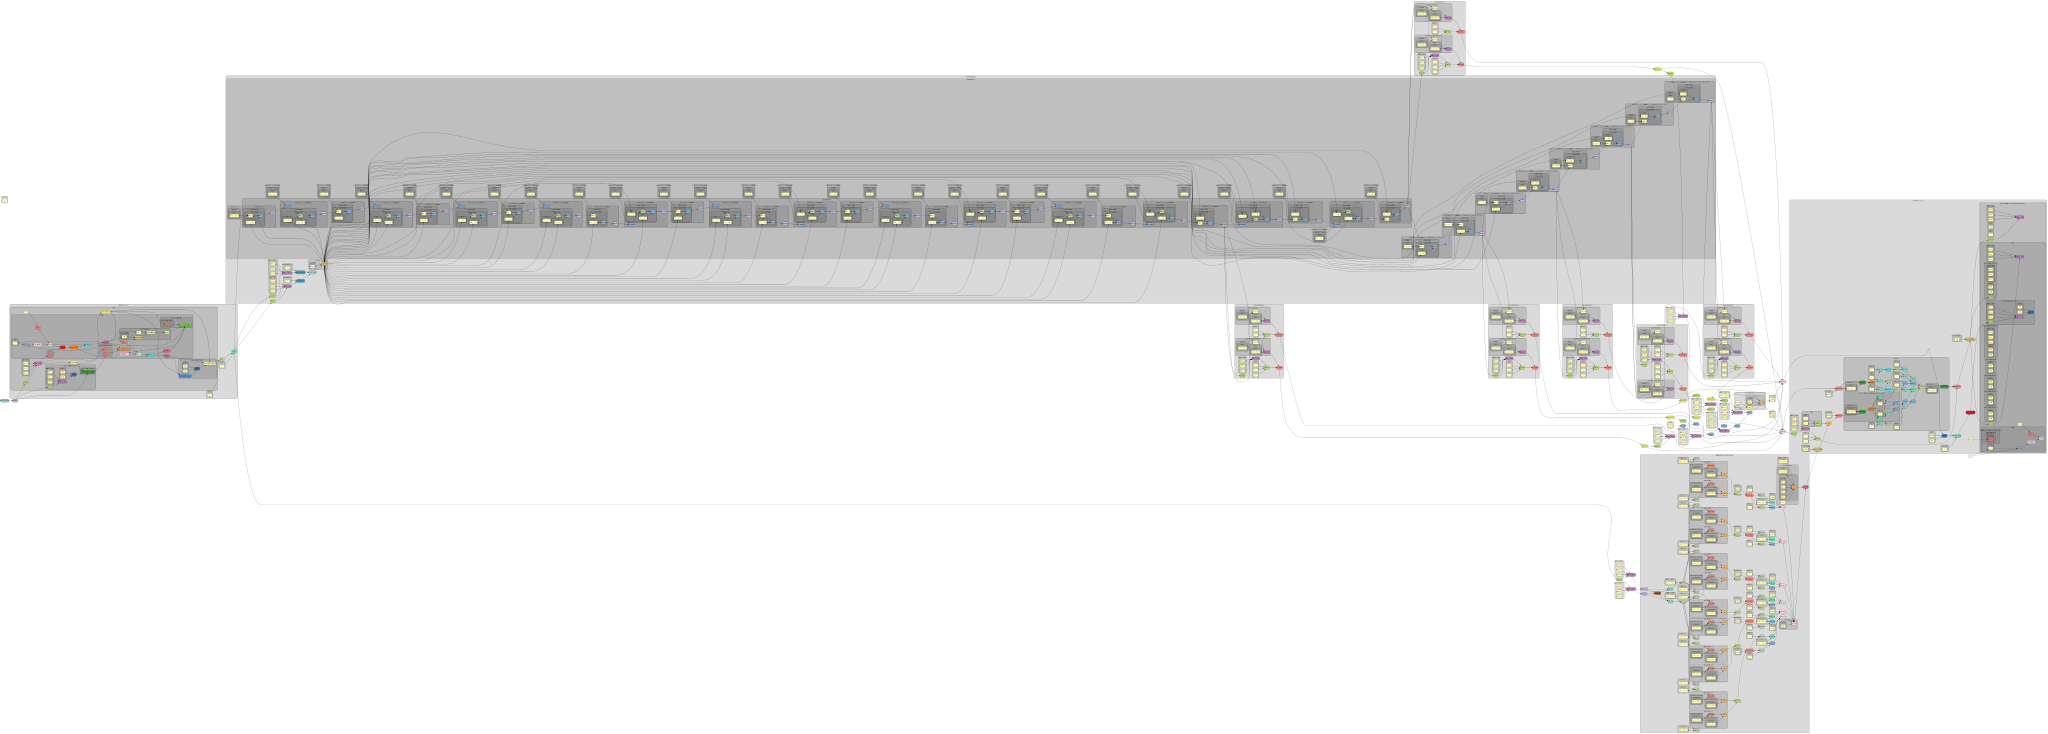

In [4]:
draw(truncate(graph, 750))

Tensorflow graphs are usually presented as deeply nested hierarchies. Another option for exploring the graph is to collapse it according to this hierarchy.

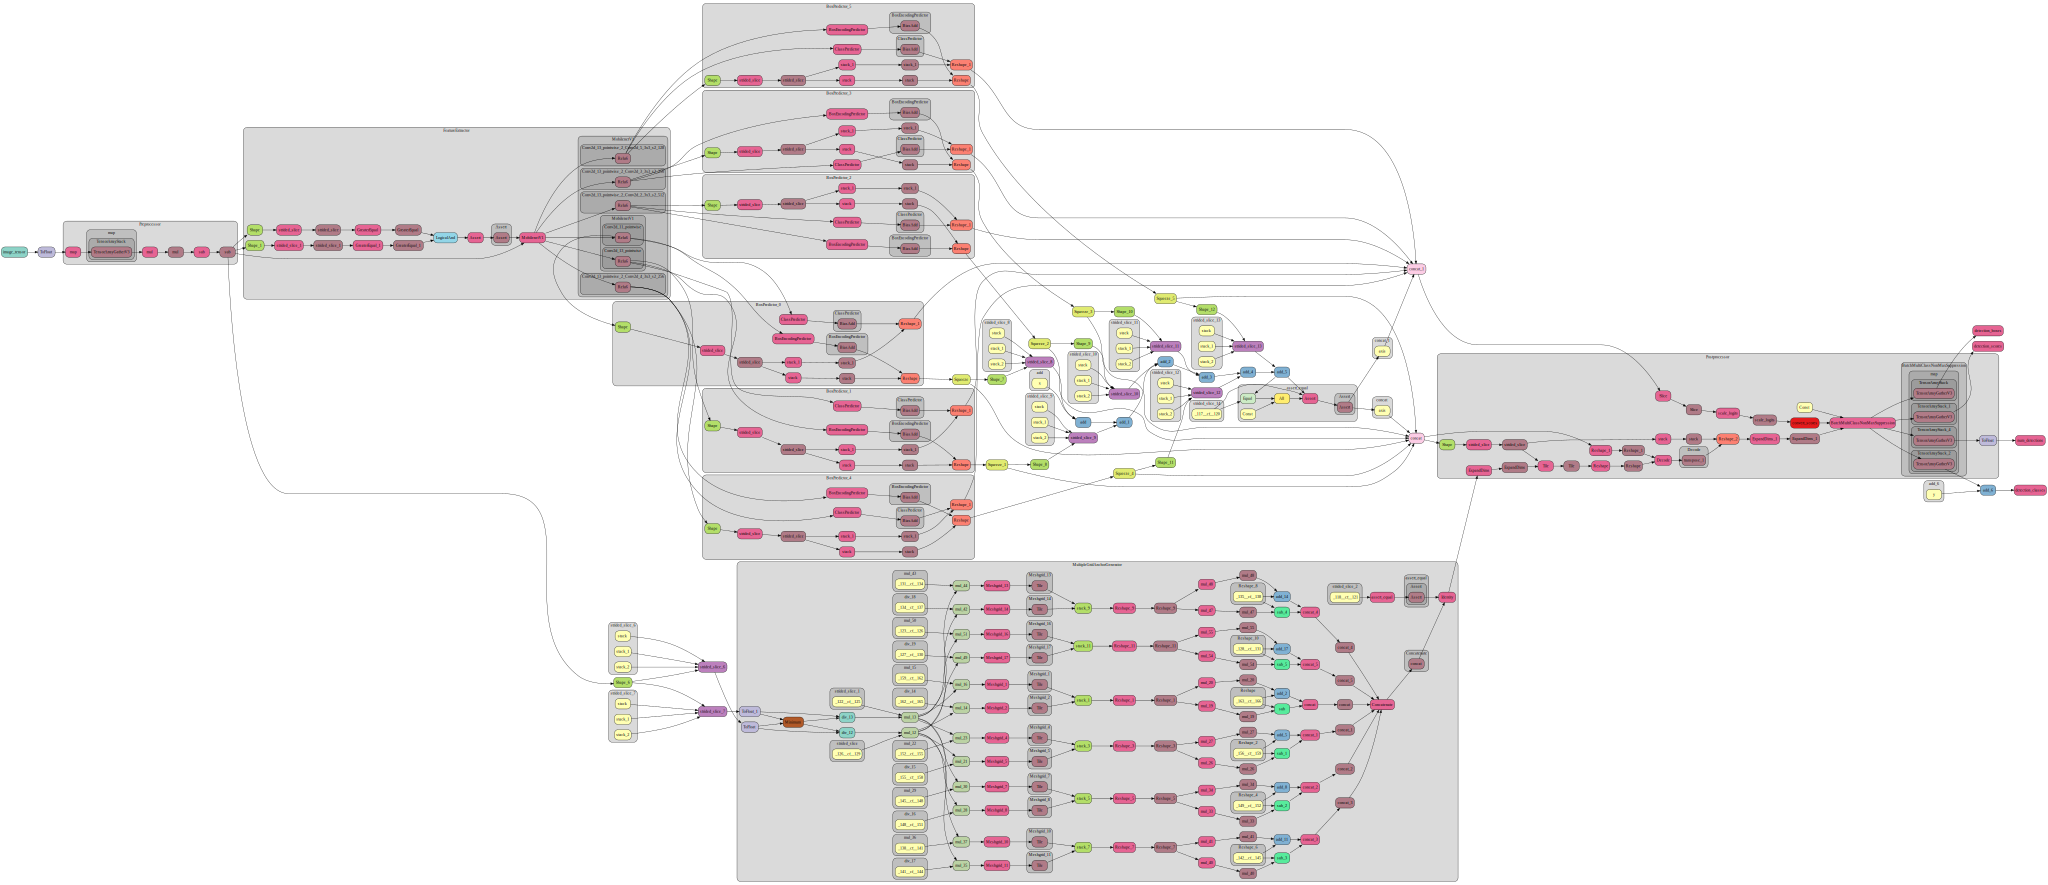

In [5]:
g = collapse(graph, levels=2)
draw(g)

Subgraphs can then be explored by drilling down into 'Graph' nodes.

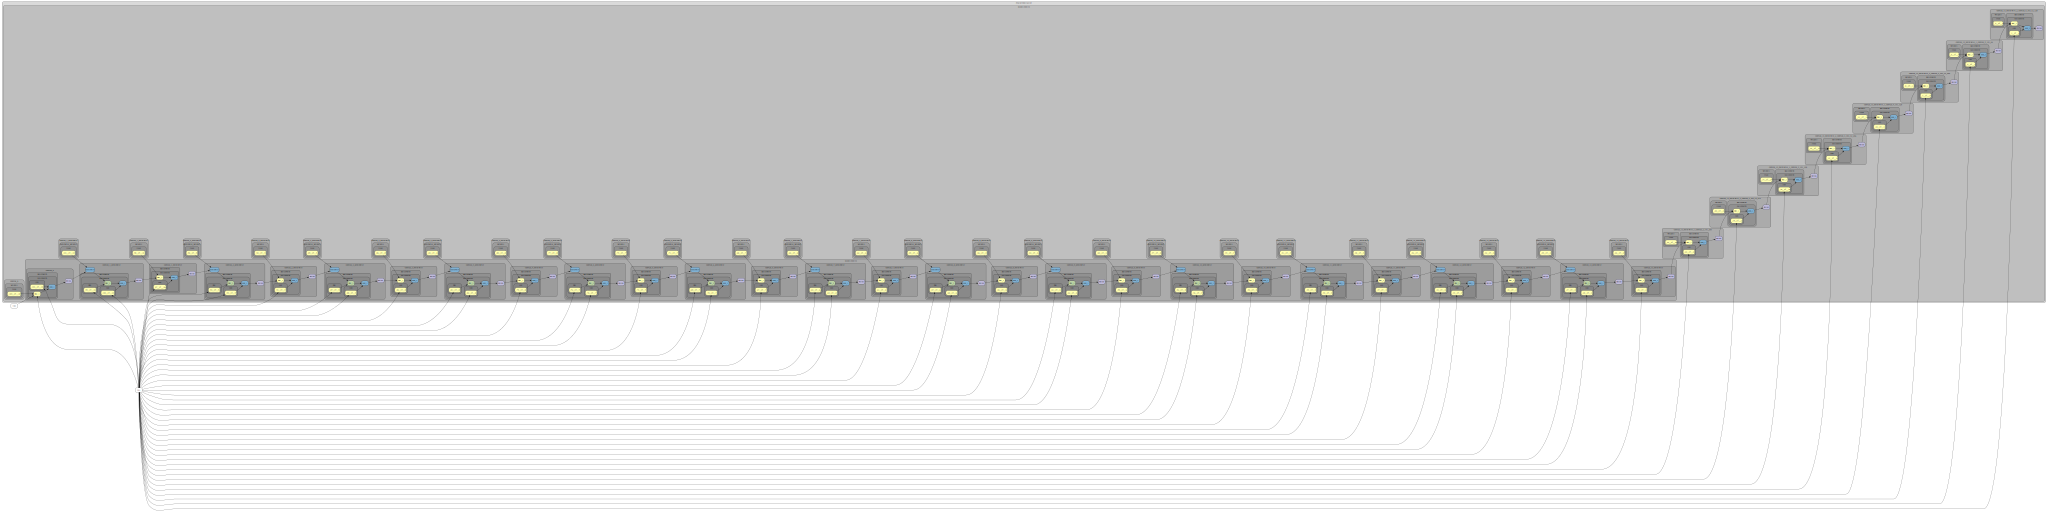

In [6]:
feature_detector = g['g_27']['params']['nodes']
draw(feature_detector)